In [1]:
import os
import pandas as pd
import numpy as np
import librosa
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
def import_ravdess(path):
    base_path = Path(path)
    exclude_folder = 'audio_speech_actors_01-24'
    
    full_path = base_path / exclude_folder
    if not full_path.exists() or not full_path.is_dir():
        raise FileNotFoundError(f"The folder {exclude_folder} was not found in the specified path.")
    
    folders = [folder for folder in full_path.iterdir() if folder.is_dir()]
    emotions = []
    file_paths = []

    for folder in folders:
        for file in folder.glob('*.wav'):
            file_paths.append(str(file))
            emotion = int(file.stem.split('-')[2])
            if emotion == 2:
                emotion = 1
            emotions.append(emotion)
    
    data = {"path": file_paths, "emotion": emotions}
    df = pd.DataFrame(data)
    return df

path_to_ravdess = r'C:\Users\RMcKe\Downloads\archive'
df = import_ravdess(path_to_ravdess)
print(df.head())


                                                path  emotion
0  C:\Users\RMcKe\Downloads\archive\audio_speech_...        1
1  C:\Users\RMcKe\Downloads\archive\audio_speech_...        1
2  C:\Users\RMcKe\Downloads\archive\audio_speech_...        1
3  C:\Users\RMcKe\Downloads\archive\audio_speech_...        1
4  C:\Users\RMcKe\Downloads\archive\audio_speech_...        1


In [3]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled

features = [extract_features(file) for file in df['path']]
X = np.array(features)
y = np.array(df['emotion'])

print(X.shape, y.shape)


(1440, 40) (1440,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = Sequential()
model.add(tf.keras.layers.Input(shape=(X.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,713 (202.00 KB)

 Trainable params: 51,713 (202.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2063 - loss: -2029.7736 - val_accuracy: 0.2222 - val_loss: -20371.3613
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1827 - loss: -54159.0938 - val_accuracy: 0.2222 - val_loss: -273814.5000
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2008 - loss: -504199.2812 - val_accuracy: 0.2222 - val_loss: -1683314.7500
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2106 - loss: -2597054.2500 - val_accuracy: 0.2222 - val_loss: -6447795.5000
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1951 - loss: -8952424.0000 - val_accuracy: 0.2222 - val_loss: -18557852.0000
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1953 - loss: -24236212.0000 - val_accuracy: 0.2222 - val_loss: -43736352.0000
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2082 - loss: -55084480.0000 - val_accuracy: 0.2222 - val_loss: -89746016.0000
Epoch 8/50
36/36 ━━━━━━━

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.2474 - loss: -290170798080.0000
Test Accuracy: 22.22%


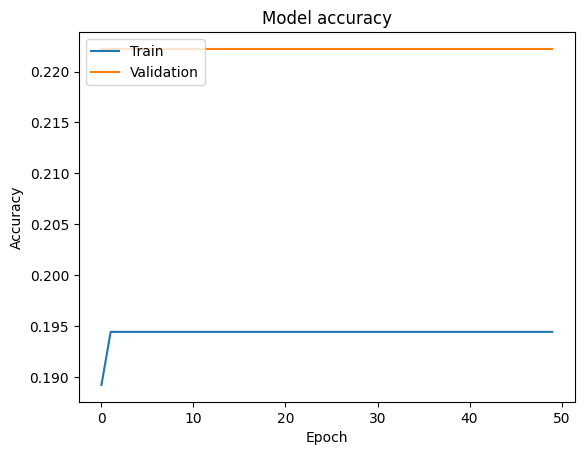

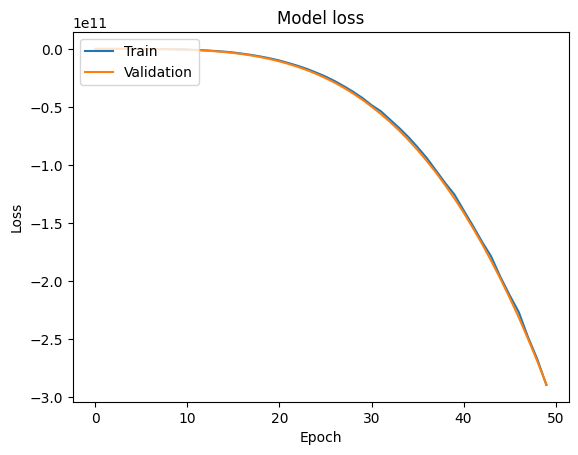

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
